In [1]:
import pandas as pd
import numpy as np

In [2]:
# you can read from the compressed file
df = pd.read_csv('census-income.zip', compression='zip')

# df = pd.read_csv('Water_Quality.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Water_Quality.csv'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Index                   1048575 non-null  int64  
 1   pH                      1028344 non-null  float64
 2   Iron                    1041584 non-null  float64
 3   Nitrate                 1029880 non-null  float64
 4   Chloride                1017741 non-null  float64
 5   Lead                    1043891 non-null  float64
 6   Zinc                    1020900 non-null  float64
 7   Color                   1047594 non-null  object 
 8   Turbidity               1039881 non-null  float64
 9   Fluoride                1015357 non-null  float64
 10  Copper                  1013693 non-null  float64
 11  Odor                    1017243 non-null  float64
 12  Sulfate                 1014050 non-null  float64
 13  Conductivity            1019772 non-null  float64
 14  Ch

### Data Scales

In [4]:

# Assuming 'df' is your DataFrame

# List of continuous and categorical features based on your description
continuous_features = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity', 
                       'Fluoride', 'Copper', 'Sulfate', 'Conductivity', 'Chlorine', 
                       'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature']
categorical_features = ['Color', 'Source', 'Month', 'Day', 'Time of Day', 'Target']

# Initialize a list to store the analysis results
details = []

# Analyze continuous features
for feature in continuous_features:
    min_value = df[feature].min()
    max_value = df[feature].max()
    details.append({
        'Name': feature,
        'Data Type': 'Numerical',
        'Scale': 'Ratio',
        'Domain': f"{min_value} - {max_value}"
    })

# Analyze categorical features
for feature in categorical_features:
    unique_values = df[feature].nunique()
    sample_values = np.array_str(df[feature].unique()[0:5])  # Sample up to 5 unique values to show
    details.append({
        'Name': feature,
        'Data Type': 'Categorical',
        'Scale': 'Nominal' if feature not in ['Month', 'Day', 'Time of Day'] else 'Ordinal',
        'Domain': f"{unique_values} unique values, e.g., {sample_values}"
    })

# Convert the analysis results into a DataFrame
details_df = pd.DataFrame(details)

# Display the DataFrame
print(details_df)


                      Name    Data Type    Scale  \
0                       pH    Numerical    Ratio   
1                     Iron    Numerical    Ratio   
2                  Nitrate    Numerical    Ratio   
3                 Chloride    Numerical    Ratio   
4                     Lead    Numerical    Ratio   
5                     Zinc    Numerical    Ratio   
6                Turbidity    Numerical    Ratio   
7                 Fluoride    Numerical    Ratio   
8                   Copper    Numerical    Ratio   
9                  Sulfate    Numerical    Ratio   
10            Conductivity    Numerical    Ratio   
11                Chlorine    Numerical    Ratio   
12               Manganese    Numerical    Ratio   
13  Total Dissolved Solids    Numerical    Ratio   
14       Water Temperature    Numerical    Ratio   
15         Air Temperature    Numerical    Ratio   
16                   Color  Categorical  Nominal   
17                  Source  Categorical  Nominal   
18          

In [7]:
# Calculate missing values count and percentage for each feature
missing_values_count = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame from the calculated series
missing_summary_df = pd.DataFrame({
    'Feature': missing_values_count.index,
    'Missing Values': missing_values_count.values,
    'Missing Values (%)': missing_values_percentage.values
})

# Display the DataFrame
print(missing_summary_df)


                   Feature  Missing Values  Missing Values (%)
0                    Index               0            0.000000
1                       pH           20231            1.929380
2                     Iron            6991            0.666714
3                  Nitrate           18695            1.782896
4                 Chloride           30834            2.940562
5                     Lead            4684            0.446701
6                     Zinc           27675            2.639296
7                    Color             981            0.093556
8                Turbidity            8694            0.829125
9                 Fluoride           33218            3.167918
10                  Copper           34882            3.326610
11                    Odor           31332            2.988055
12                 Sulfate           34525            3.292564
13            Conductivity           28803            2.746871
14                Chlorine           10162            0

In [ ]:
from sklearn.impute import SimpleImputer

def impute_missing_values(df):
    # Identify numerical and categorical columns (assuming the same list as before)
    numerical_cols = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity', 
                      'Fluoride', 'Copper', 'Sulfate', 'Conductivity', 'Chlorine', 
                      'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature']
    categorical_cols = ['Color', 'Source', 'Month', 'Day', 'Time of Day', 'Target']
    
    # Create imputers
    numerical_imputer = SimpleImputer(strategy='median')
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    
    # Impute missing values
    df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
    
    return df

# Impute missing values in the DataFrame
df_imputed = impute_missing_values(df.copy())

# Verify the changes
print(df_imputed.isnull().sum())


: 

#### Q2.2 Create a Data Quality Report (40 pts)

Include the bar plots and histograms for visualizing the distributions. You may get your descriptions from features.csv file. 

The examples for a continuous and a categorical feature can be seen below. You do not need to use jupyter formatting provided here. You can print a DataFrame or read a csv, and display it. If you will read from a csv, make sure you have that csv in your submission zip file.

In [9]:
# Read the features CSV file into a DataFrame
features = pd.read_csv('features.csv', index_col=0)


# Make new dataframe using scale to differentiate continuous from categorical
continuous_features = features.loc[features['scale'].isin(['R', 'I']), ['col_name', 'desc']].rename(columns={'col_name': 'Feature', 'desc': 'Desc.'})


# Calculate continuous feature statistics
for feature in continuous_features['Feature']:
    col_data = df[feature]
    count = col_data.count()
    percent_missing = (col_data.isnull().sum() / len(col_data)) * 100
    cardinality = col_data.nunique()
    minimum = col_data.min()
    q1 = col_data.quantile(0.25)
    median = col_data.median()
    q3 = col_data.quantile(0.75)
    maximum = col_data.max()
    mean = col_data.mean()
    std_dev = col_data.std()
    notes = ''
    
    # Append statistics to the continuous_features DataFrame
    continuous_features.loc[continuous_features['Feature'] == feature, 'Count'] = int(count)
    continuous_features.loc[continuous_features['Feature'] == feature, '% of Missing'] = percent_missing
    continuous_features.loc[continuous_features['Feature'] == feature, 'Card.'] = int(cardinality)
    continuous_features.loc[continuous_features['Feature'] == feature, 'Min.'] = int(minimum)
    continuous_features.loc[continuous_features['Feature'] == feature, 'Q1'] = q1
    continuous_features.loc[continuous_features['Feature'] == feature, 'Median'] = median
    continuous_features.loc[continuous_features['Feature'] == feature, 'Q3'] = q3
    continuous_features.loc[continuous_features['Feature'] == feature, 'Max.'] = int(maximum)
    continuous_features.loc[continuous_features['Feature'] == feature, 'Mean'] = mean
    continuous_features.loc[continuous_features['Feature'] == feature, 'Std. Dev.'] = std_dev
    continuous_features.loc[continuous_features['Feature'] == feature, 'Notes'] = notes
    
columns_to_format = ['% of Missing', 'Median', 'Q1', 'Q3', 'Mean', 'Std. Dev.']
continuous_features[columns_to_format] = continuous_features[columns_to_format].round(2)
continuous_features.reset_index(drop=True, inplace=True)

continuous_features.to_csv('continuous_features_report.csv', index=False)

# Display the Data Quality Report for Continuous Features
continuous_features

,Feature,Desc.,Count,% of Missing,Card.,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.,Notes
0,AAGE,Age,199523.0,0.0,91.0,0.0,15.00,33.00,50.00,90.0,34.49,22.31,
1,AHRSPAY,Wage Per Hour,199523.0,0.0,1240.0,0.0,0.00,0.00,0.00,9999.0,55.43,274.90,
2,CAPGAIN,Capital Gains,199523.0,0.0,132.0,0.0,0.00,0.00,0.00,99999.0,434.72,4697.53,
3,CAPLOSS,Capital Losses,199523.0,0.0,113.0,0.0,0.00,0.00,0.00,4608.0,37.31,271.90,
4,DIVVAL,Dividends from Stocks,199523.0,0.0,1478.0,0.0,0.00,0.00,0.00,99999.0,197.53,1984.16,
5,MARSUPWT,Instance Weight,199523.0,0.0,99800.0,37.0,1061.62,1618.31,2188.61,18656.0,1740.38,993.77,
6,NOEMP,Num Persons Worked for Employer,199523.0,0.0,7.0,0.0,0.00,1.00,4.00,6.0,1.96,2.37,
7,WKSWORK,Weeks Worked in Year,199523.0,0.0,53.0,0.0,0.00,8.00,52.00,52.0,23.17,24.41,


In [10]:
# Read the features CSV file into a DataFrame
features = pd.read_csv('features.csv', index_col=0)
df = pd.read_csv('census-income.csv', names=columns_abbr, sep=r',', skipinitialspace=True)

# Make new dataframe using scale to differentiate categorical from continuous
categorical_features = features.loc[features['scale'].isin(['N', 'O']), ['col_name', 'desc']].rename(columns={'col_name': 'Feature', 'desc': 'Desc.'})

# Calculate continuous feature statistics
for feature in categorical_features['Feature']:
    col_data = df[feature]
    count = col_data.count()
    percent_missing = (col_data.isnull().sum() / len(col_data)) * 100
    cardinality = col_data.nunique()
    mode = col_data.value_counts().index[0]
    mode_frequency = col_data.value_counts().iloc[0]
    mode_percentage = mode_frequency / col_data.count() * 100
    second_mode = col_data.value_counts().index[1]
    second_mode_frequency = col_data.value_counts().iloc[1]
    second_mode_percentage = second_mode_frequency / col_data.count() * 100
    notes = ''
    
    # Append statistics to the categorical_features DataFrame
    categorical_features.loc[categorical_features['Feature'] == feature, 'Count'] = count
    categorical_features.loc[categorical_features['Feature'] == feature, '% of Missing'] = percent_missing
    categorical_features.loc[categorical_features['Feature'] == feature, 'Card.'] = cardinality
    categorical_features.loc[categorical_features['Feature'] == feature, 'Mode'] = mode
    categorical_features.loc[categorical_features['Feature'] == feature, 'Mode Freq.'] = mode_frequency
    categorical_features.loc[categorical_features['Feature'] == feature, 'Mode %'] = mode_percentage
    categorical_features.loc[categorical_features['Feature'] == feature, '2nd Mode'] = second_mode
    categorical_features.loc[categorical_features['Feature'] == feature, '2nd Mode Freq.'] = second_mode_frequency
    categorical_features.loc[categorical_features['Feature'] == feature, '2nd Mode %'] = second_mode_percentage
    categorical_features.loc[categorical_features['Feature'] == feature, 'Notes'] = notes
    
columns_to_format = ['% of Missing', 'Mode %', '2nd Mode %']
categorical_features[columns_to_format] = categorical_features[columns_to_format].round(2)
categorical_features.reset_index(drop=True, inplace=True)
categorical_features.to_csv('categorical_features_report.csv', index=False)

# Display the Data Quality Report for Continuous Features
categorical_features

,Feature,Desc.,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %,Notes
0,ACLSWKR,Class of Worker,199523.0,0.00,9.0,Not in universe,100245.0,50.24,Private,72028.0,36.10,
1,ADTIND,Detailed Industry Recode,199523.0,0.00,52.0,0,100684.0,50.46,33,17070.0,8.56,
2,ADTOCC,Detailed Occupation Recode,199523.0,0.00,47.0,0,100684.0,50.46,2,8756.0,4.39,
3,AHGA,Education,199523.0,0.00,17.0,High school graduate,48407.0,24.26,Children,47422.0,23.77,
4,AHSCOL,Enroll in Edu. Inst. Last Wk.,199523.0,0.00,3.0,Not in universe,186943.0,93.69,High school,6892.0,3.45,
5,AMARITL,Marital Status,199523.0,0.00,7.0,Never married,86485.0,43.35,Married-civilian spouse present,84222.0,42.21,
6,AMJIND,Major Industry Code,199523.0,0.00,24.0,Not in universe or children,100684.0,50.46,Retail trade,17070.0,8.56,
7,AMJOCC,Major Occupation Code,199523.0,0.00,15.0,Not in universe,100684.0,50.46,Adm support including clerical,14837.0,7.44,
8,ARACE,Race,199523.0,0.00,5.0,White,167365.0,83.88,Black,20415.0,10.23,
9,AREORGN,Hispanic Origin,198649.0,0.44,9.0,All other,171907.0,86.54,Mexican-American,8079.0,4.07,


### Q3 Outlier Identification (25 pts)

#### Q3.1 For each continuous feature, identify the outliers using the IQR method. (15 pts)
For each feature, report the lower and upper bounds and number of instances that are identified as outliers.
Then, display boxplots and discuss if your outliers analysis makes sense. Discuss why you would (or would not) use the IQR method.


Feature: AAGE
Lower Bound: -37.5
Upper Bound: 102.5
Number of Outliers: 0

For age, the IQR method would work, but there are no outliers found using this method.


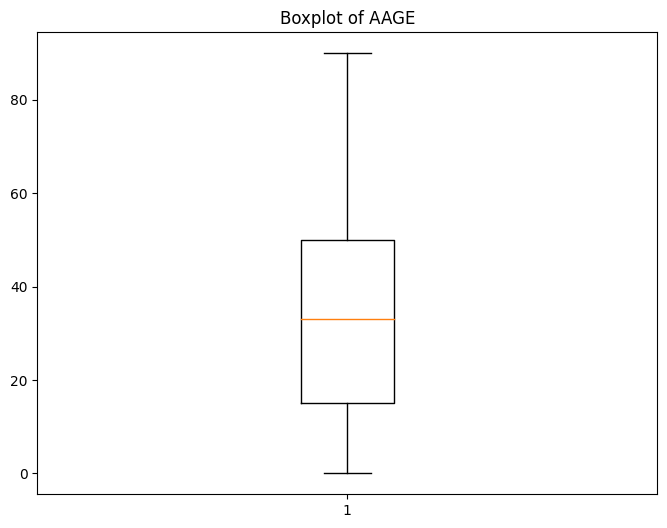

Feature: AHRSPAY
Lower Bound: 0.0
Upper Bound: 0.0
Number of Outliers: 11304

There are too many zeroes which skews the data so IQR is not a good method.


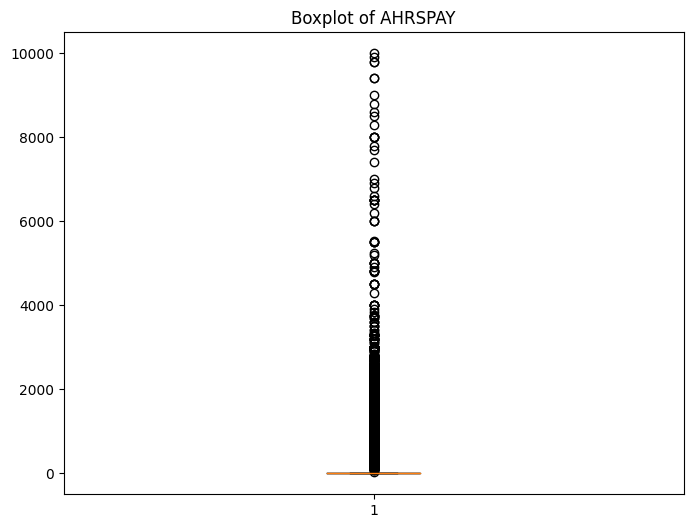

Feature: CAPGAIN
Lower Bound: 0.0
Upper Bound: 0.0
Number of Outliers: 7379

The same as above, there are too many zeroes so IQR is not a good method.


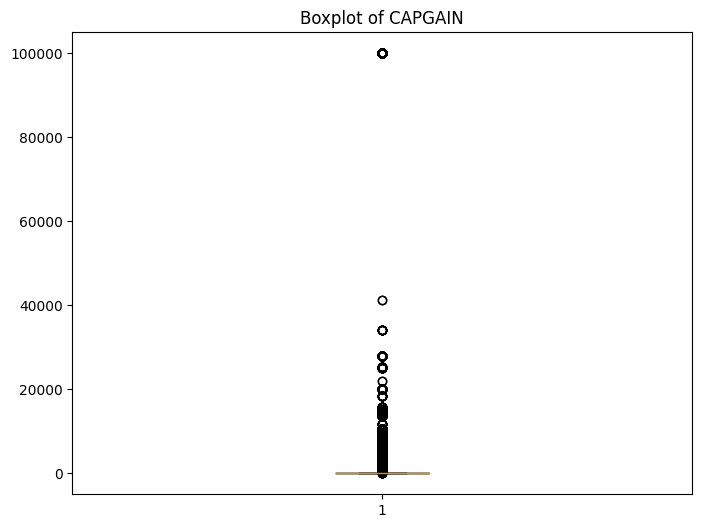

Feature: CAPLOSS
Lower Bound: 0.0
Upper Bound: 0.0
Number of Outliers: 3906

We shouldn't use IQR, there are too many zeroes.


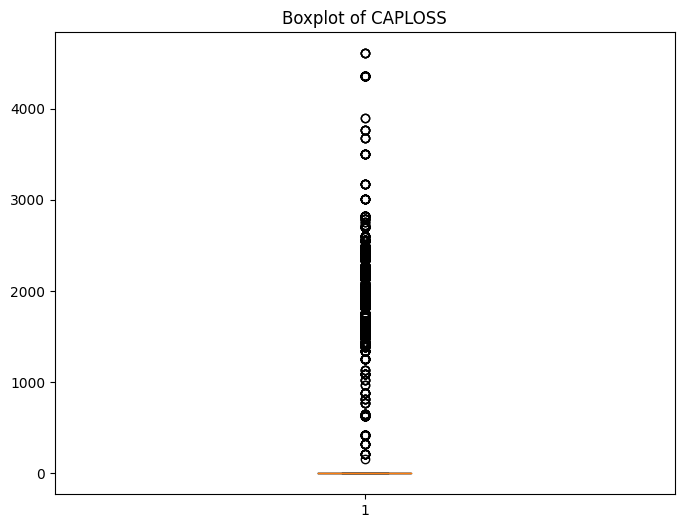

Feature: DIVVAL
Lower Bound: 0.0
Upper Bound: 0.0
Number of Outliers: 21141

IQR is not a good method, there are two many zeroes.


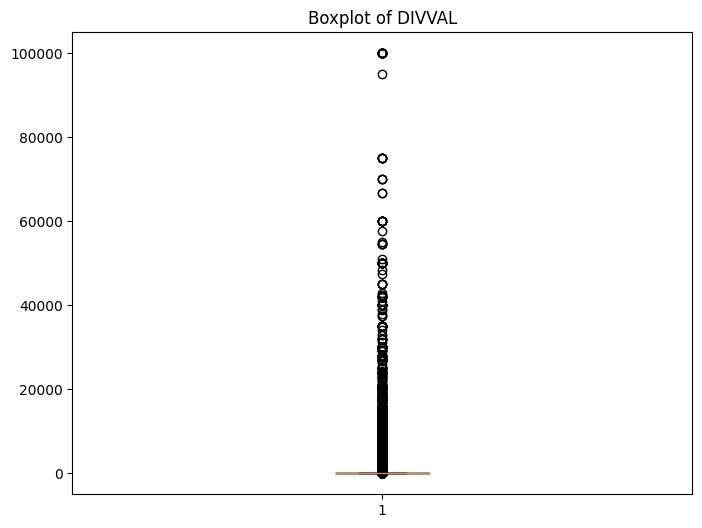

Feature: MARSUPWT
Lower Bound: -628.8775000000003
Upper Bound: 3879.1025000000004
Number of Outliers: 6238

IQR is not a good method, there are too many values considered outliers


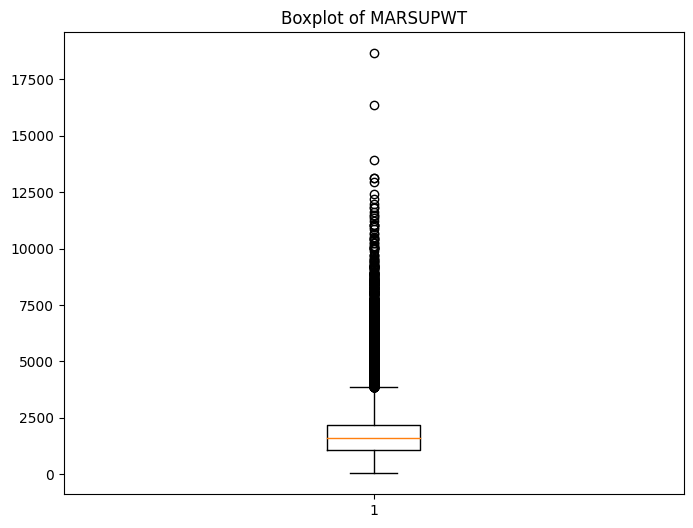

Feature: NOEMP
Lower Bound: -6.0
Upper Bound: 10.0
Number of Outliers: 0

There aren't enough unique values to gain much from IQR


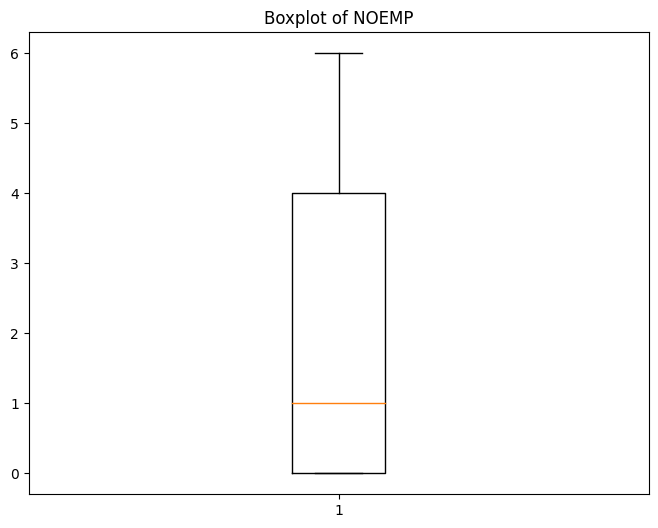

Feature: WKSWORK
Lower Bound: -78.0
Upper Bound: 130.0
Number of Outliers: 0

There's a pretty high skew here, so IQR doesn't make sense


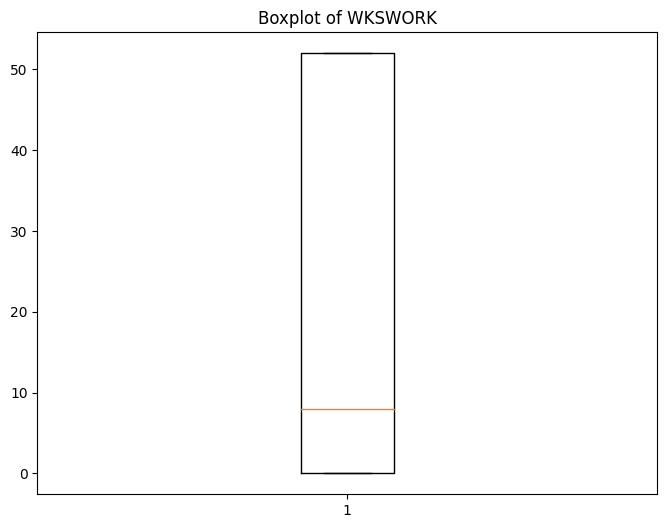

In [13]:
features = pd.read_csv('features.csv', index_col=0)
df = pd.read_csv('census-income.csv', names=columns_abbr, sep=r',', skipinitialspace=True)


# Make new dataframe using scale to differentiate continuous from categorical
continuous_features = features.loc[features['scale'].isin(['R', 'I']), ['col_name', 'desc']].rename(columns={'col_name': 'Feature', 'desc': 'Desc.'})
df_filtered = df[continuous_features['Feature']]
x = 0

def identify_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data < lower_bound) | (data > upper_bound)
    return lower_bound, upper_bound, outliers.sum()



# Discussion comments
discussion = ["For age, the IQR method would work, but there are no outliers found using this method.",
              "There are too many zeroes which skews the data so IQR is not a good method.", 
              "The same as above, there are too many zeroes so IQR is not a good method.",
              "We shouldn't use IQR, there are too many zeroes.",
              "IQR is not a good method, there are two many zeroes.",
              "IQR is not a good method, there are too many values considered outliers",
              "There aren't enough unique values to gain much from IQR",
              "There's a pretty high skew here, so IQR doesn't make sense"]


for feature in continuous_features['Feature']:
    # Identify outliers
    lower_bound, upper_bound, num_outliers = identify_outliers(df[feature])
    
    # Report results
    print(f"Feature: {feature}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {num_outliers}")
    print()

    # Display boxplot
    # plt.figure(figsize=(8, 6))
    # plt.boxplot(df[feature])

    # plt.title(f'Boxplot of {feature}')
        
    # print(discussion[x])
    # x+=1
    
    # plt.show()



#### Q3.2. Replace the outlying values in WKSWORK, MARSUPWT and AAGE features. (10 pts)
Use clamping with upper and lower bounds you found in the previous step. Report how many individual cells are being updated for each feature.


In [14]:
# Function to clamp values
def clamp_values(data, lower_bound, upper_bound):
    return data.clip(lower=lower_bound, upper=upper_bound)

# Clamping bounds
clamping_bounds = {
    'AAGE': (-37.5, 102.5),
    'MARSUPWT': (-628.88, 3879.1),
    'WKSWORK': (-78.0, 130.0)
}

# To store the number of updated cells for each feature
updated_cells = {}

for feature in clamping_bounds:
    lower_bound, upper_bound = clamping_bounds[feature]
    print(f"Feature: {feature}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    
    # Clamp the values
    updated_data = clamp_values(df[feature], lower_bound, upper_bound)
    
    # Count num updated cells and replace df values
    num_updated_cells = (updated_data != df[feature]).sum()
    updated_cells[feature] = num_updated_cells
    df[feature] = updated_data
    
    print(f"Number of Updated Cells: {num_updated_cells}\n")

Feature: AAGE
Lower Bound: -37.5
Upper Bound: 102.5
Number of Updated Cells: 0

Feature: MARSUPWT
Lower Bound: -628.88
Upper Bound: 3879.1
Number of Updated Cells: 6238

Feature: WKSWORK
Lower Bound: -78.0
Upper Bound: 130.0
Number of Updated Cells: 0



### Q4 Normalization (20 pts)

Normalize the MARSUPWT, AAGE, NOEMP, CAPGAIN, and CAPLOSS features
* Use range normalization for MARSUPWT feature
* Use robust scaling for NOEMP feature
* Use Z-score normalization for AAGE feature
* Use log scaling for CAPGAIN and CAPLOSS features (impute your zero values with 10 before transformation to avoid undefined  $log_{b}0$)

In [15]:
import math

# Range normalization MARSUPWT feature
min_val = df['MARSUPWT'].min()
max_val = df['MARSUPWT'].max()
df['MARSUPWT_normalized'] = (df['MARSUPWT'] - min_val) / (max_val - min_val)

# Robust scaling NOEMP feature
Q1 = df['NOEMP'].quantile(0.25)
Q3 = df['NOEMP'].quantile(0.75)
IQR = Q3 - Q1
median = df['NOEMP'].median()
df['NOEMP_scaled'] = (df['NOEMP'] - median) / IQR

# Z-score normalization AAGE feature
mean = df['AAGE'].mean()
std_dev = df['AAGE'].std()
df['AAGE_zscore'] = (df['AAGE'] - mean) / std_dev

# Impute 0 values in CAPGAIN and CAPLOSS with 10
df['CAPGAIN'] = df['CAPGAIN'].replace(0, 10)
df['CAPLOSS'] = df['CAPLOSS'].replace(0, 10)

# Log scaling CAPGAIN and CAPLOSS features
df['CAPGAIN_log'] = df['CAPGAIN'].apply(lambda x: math.log(x))
df['CAPLOSS_log'] = df['CAPLOSS'].apply(lambda x: math.log(x))

print("Normalized Features:")
df[['MARSUPWT_normalized', 'NOEMP_scaled', 'AAGE_zscore', 'CAPGAIN_log', 'CAPLOSS_log']]

Normalized Features:


,MARSUPWT_normalized,NOEMP_scaled,AAGE_zscore,CAPGAIN_log,CAPLOSS_log
0,0.432731,-0.25,1.725874,2.302585,2.302585
1,0.264415,0.00,1.053557,2.302585,2.302585
2,0.248379,-0.25,-0.739289,2.302585,2.302585
3,0.447844,-0.25,-1.142679,2.302585,2.302585
4,0.268479,-0.25,-1.097858,2.302585,2.302585
...,...,...,...,...,...
199518,0.238830,-0.25,2.353370,2.302585,2.302585
199519,0.169040,0.00,1.367305,8.766862,2.302585
199520,0.490770,1.25,0.560524,2.302585,2.302585
199521,1.000000,-0.25,-0.828931,2.302585,2.302585
